In [ ]:
# вариант 28: u'' + tgx * u' + x * u = (1 + x) * cosx + x^2 * sinx  [0, 1]
# Тихомиров Юнес Б20-215
import numpy as np
import matplotlib.pyplot as plt
np.seterr(divide = 'ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [ ]:
def func(x):
   return (1 + x) * np.cos(x) + x ** 2 * np.sin(x)

def analyticSolution(x):
  return x * np.sin(x) + np.cos(x)

def equation(x, func, uList): # uList - two-dimensional vector: 1st dimension - values of function, 2nd - values of derrivative
  return (- uList[1][0]) * np.tan(x) - (uList[0][0] * x) + func(x) 


In [ ]:
a = 0
b = 1
h = 0.05
u0 = np.array([[1], [0]])
xRange = np.arange(a, b + h, h)
uAnalytic = analyticSolution(xRange)

**Euler Method**

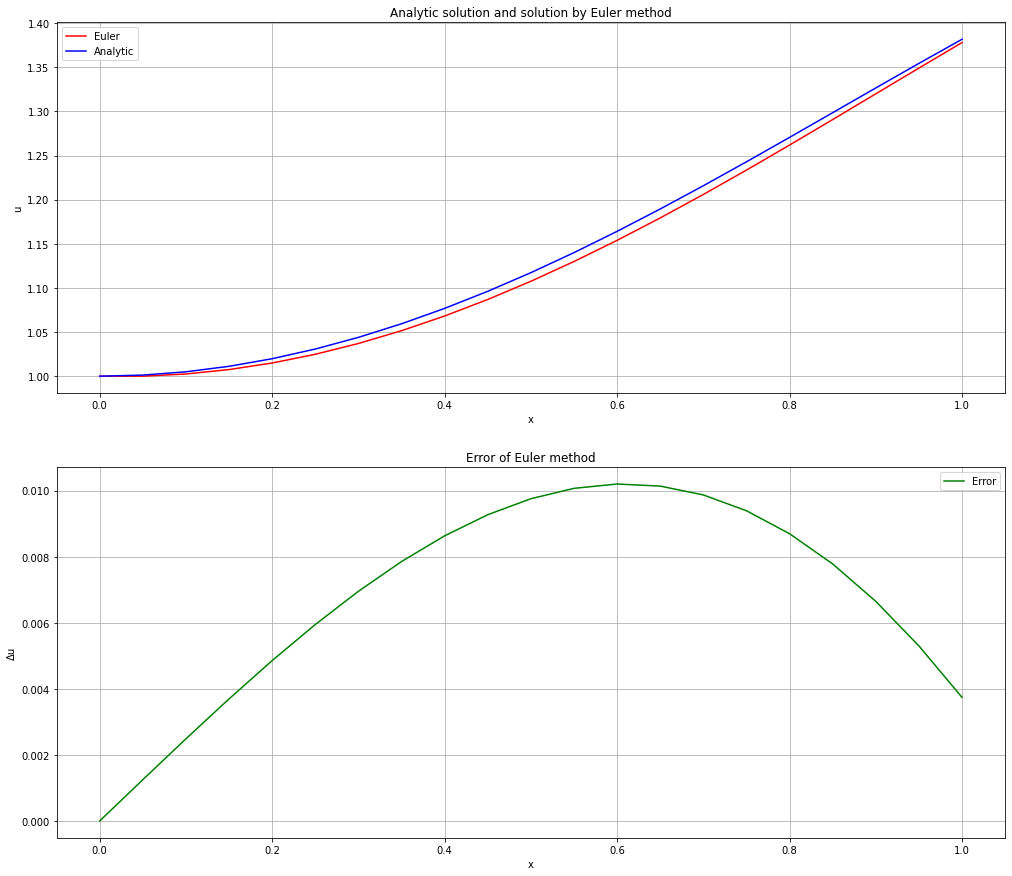

In [ ]:
def euler(equation, xRange, func, uList):
  yList = []
  yList.append(uList[0][0])
  h = xRange[1]-xRange[0]
  for i in range(1,len(xRange)):
    uList = uList + h * np.array( [[ uList[1][0] ], [ equation(np.arange(a, b + h, h)[i - 1], func, uList) ]] )
    yList.append(uList[0][0])
  return yList

fig, axs = plt.subplots(2, figsize = (17, 15))
axs[0].plot(xRange, euler(equation, xRange, func, u0), color='r', label='Euler')
axs[0].set_title("Analytic solution and solution by Euler method")
axs[0].plot(xRange, uAnalytic, color='b', label='Analytic')
axs[1].plot(xRange, [abs(euler(equation, xRange, func, u0)[i] - uAnalytic[i])  for i in range (len(xRange))], color = 'g', label = 'Error')
axs[1].set_title("Error of Euler method")
axs[0].set_ylabel("u")
axs[1].set_ylabel("Δu")

for ax in axs:
  ax.set_xlabel("x")
  # ax.set_ylabel("u")
  ax.legend()
  ax.grid(True)
plt.show()

Runge-Cutta 4

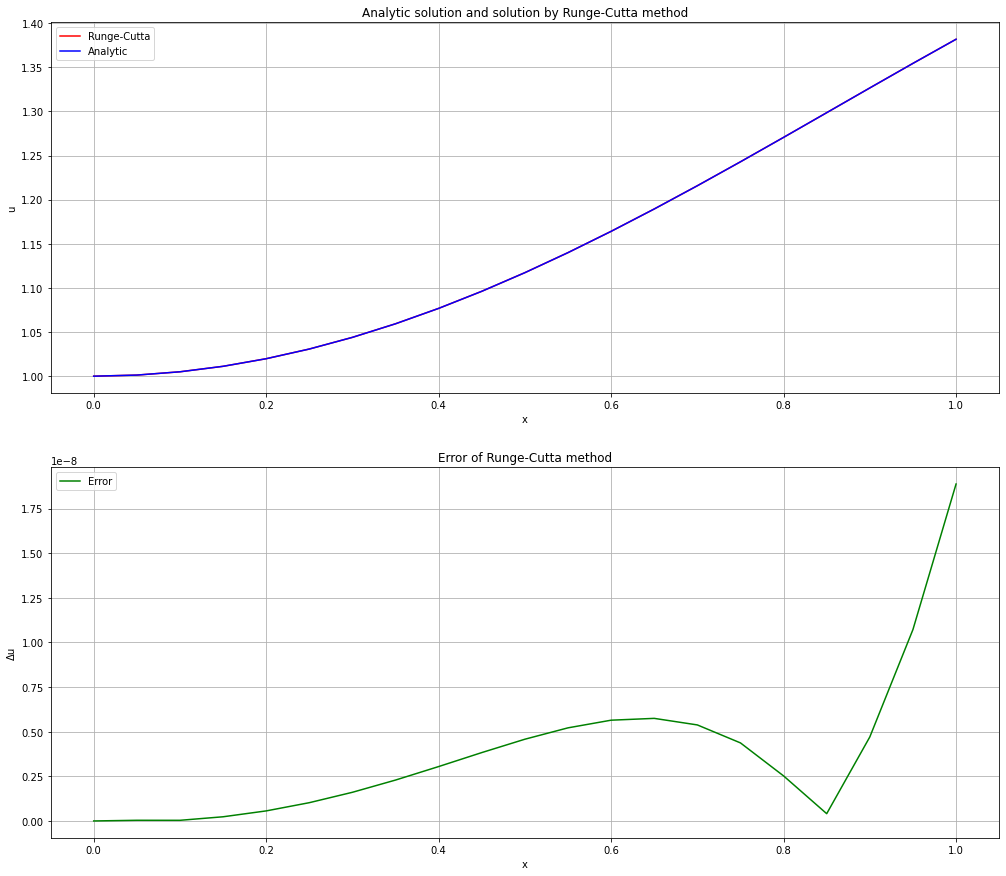

In [ ]:
def rungeCutta(equation, xRange, func, u0):
  h = xRange[1] - xRange[0]
  uList = np.zeros(len(xRange))
  uDerivList = np.zeros(len(xRange)) 
  uList[0] = u0[0][0]
  uDerivList[0] = u0[1][0]

  for i in range(1,len(xRange)):
    K1 = equation( xRange[i-1], func, np.array([[uList[i-1]], [uDerivList[i-1]]]) )
    q1 = uDerivList[i - 1]

    K2 = equation( xRange[i - 1] + h / 2, func, np.array([[uList[i - 1] + h / 2 * q1], [uDerivList[i - 1] + h / 2 * K1]]) )
    q2 = uDerivList[i - 1] + h / 2 * K1

    K3 = equation( xRange[i - 1] + h / 2, func, np.array([[uList[i - 1] + h / 2 * q2], [uDerivList[i - 1] + h / 2 * K2]]) )
    q3 = uDerivList[i - 1] + h / 2 * K2

    K4 = equation( xRange[i-1] + h, func, np.array([[uList[i - 1] + h * q3], [uDerivList[i - 1] + h * K3]]) )
    q4 = uDerivList[i - 1] + h * K3

    uDerivList[i] = uDerivList[i - 1] + (h / 6) * (K1 + 2 * K2 + 2 * K3 + K4)
    uList[i] = uList[i - 1] + (h / 6) * (q1 + 2 * q2 + 2 * q3 + q4)

  return uList, uDerivList

fig, axs = plt.subplots(2, figsize = (17, 15))
axs[0].plot(xRange, rungeCutta(equation, xRange, func, u0)[0], color='r', label='Runge-Cutta')
axs[0].set_title("Analytic solution and solution by Runge-Cutta method")
axs[0].plot(xRange, uAnalytic, color='b', label='Analytic')
axs[1].plot(xRange, [abs(rungeCutta(equation, xRange, func, u0)[0][i] - uAnalytic[i])  for i in range (len(xRange))], color = 'g', label = 'Error')
axs[1].set_title("Error of Runge-Cutta method")
axs[0].set_ylabel("u")
axs[1].set_ylabel("Δu")

for ax in axs:
  ax.set_xlabel("x")
  # ax.set_ylabel("u")
  ax.legend()
  ax.grid(True)
plt.show()

Adams method

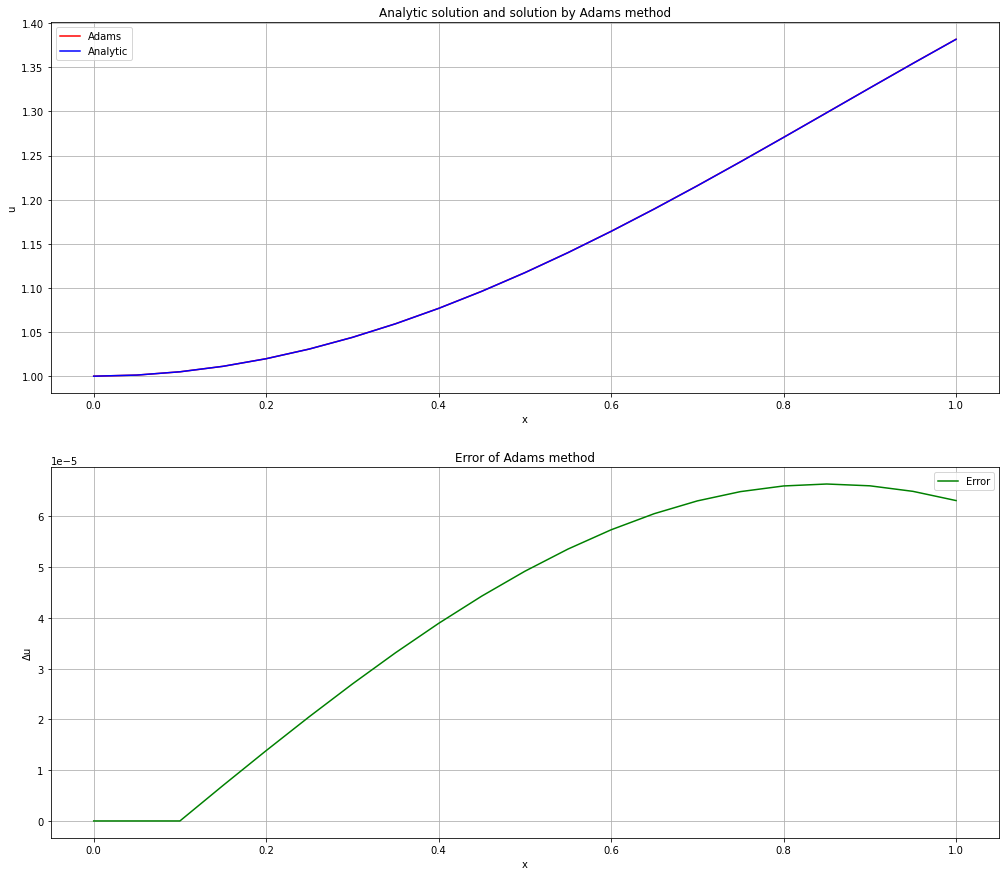

In [ ]:
def adams(equation, xRange, func, u0):
  h = xRange[1] - xRange[0]
  uDerivList = np.zeros(len(xRange))
  uList = np.zeros(len(xRange))
  uList[0:3] = rungeCutta(equation, xRange[:4], func, u0)[0][:3]
  uDerivList[0:3] = rungeCutta(equation, xRange[:4], func, u0)[1][:3]

  for i in range(3,len(xRange)):
      K1 = equation( xRange[i - 1], func, np.array([[uList[i - 1]], [uDerivList[i - 1]]]) )
      q1 = uDerivList[i - 1] 

      K2 = equation( xRange[i-2], func, np.array([[uList[i - 2]], [uDerivList[i - 2]]]) )
      q2 = uDerivList[i - 2] 

      K3 = equation( xRange[i - 3], func, np.array([[uList[i - 3]], [uDerivList[i - 3]]]) )
      q3 = uDerivList[i - 3] 

      uDerivList[i] = uDerivList[i - 1] + h * (23 / 12 * K1 - 4 / 3 * K2 + 5 / 12 * K3)
      uList[i] = uList[i - 1] + h * (23 / 12 * q1 - 4 / 3 * q2 + 5 / 12 * q3)

  return uList

fig, axs = plt.subplots(2, figsize = (17, 15))
axs[0].plot(xRange, adams(equation, xRange, func, u0), color='r', label='Adams')
axs[0].set_title("Analytic solution and solution by Adams method")
axs[0].plot(xRange, uAnalytic, color='b', label='Analytic')
axs[1].plot(xRange, [abs(adams(equation, xRange, func, u0)[i] - uAnalytic[i])  for i in range (len(xRange))], color = 'g', label = 'Error')
axs[1].set_title("Error of Adams method")
axs[0].set_ylabel("u")
axs[1].set_ylabel("Δu")

for ax in axs:
  ax.set_xlabel("x")
  # ax.set_ylabel("u")
  ax.legend()
  ax.grid(True)
plt.show()

**Runge estimation**

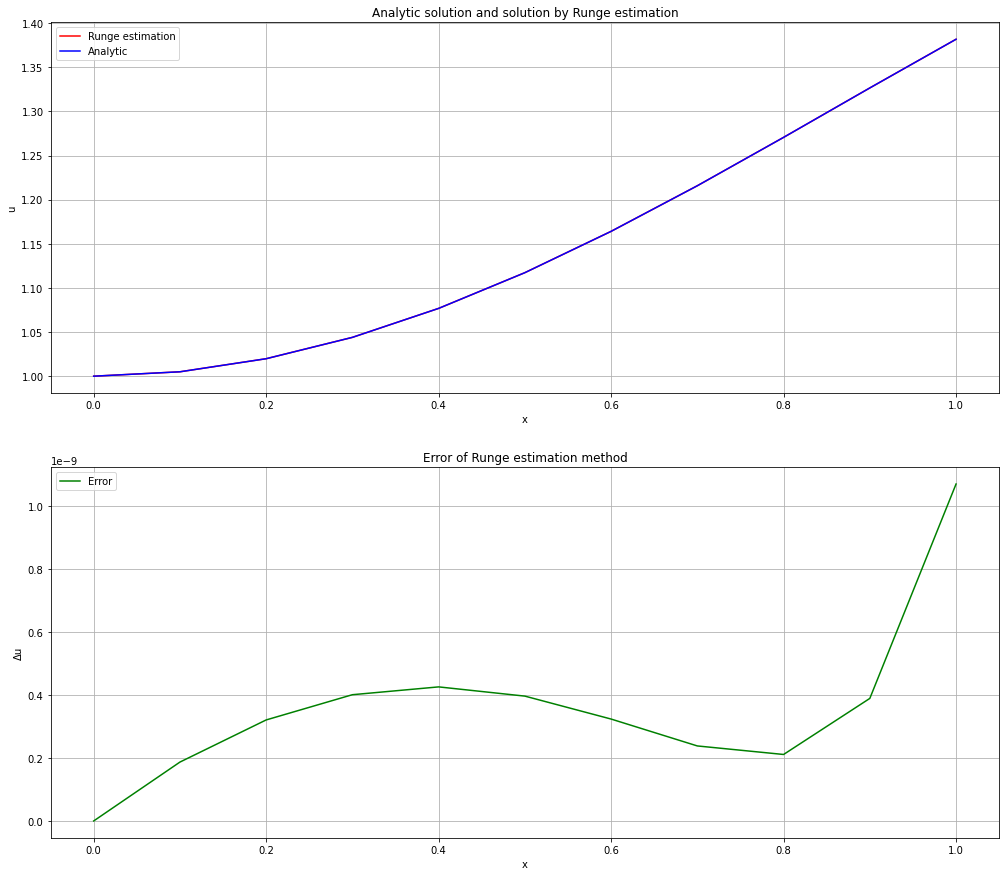

In [ ]:
def rungeEstimation(equation, xRange, func, u0):
  uList = []
  h = xRange[1]-xRange[0]
  xHalfRange = np.arange(a, b + h, h / 2)
  
  yList = rungeCutta(equation, xRange, func, u0)[0]
  yHalfList = rungeCutta(equation, xHalfRange, func, u0)[0]

  for i in range(len(xRange)):
      uList.append(yHalfList[i * 2] + (yHalfList[i * 2] - yList[i]) / (2 ** 4 - 1))  
  return uList

xRangeRude = np.arange(a, b + 2 * h, 2 * h)
uAnalyticRude = analyticSolution(xRangeRude)

fig, axs = plt.subplots(2, figsize = (17, 15))
axs[0].plot(xRangeRude, rungeEstimation(equation, xRangeRude, func, u0), color='r', label='Runge estimation')
axs[0].set_title("Analytic solution and solution by Runge estimation")
axs[0].set_ylabel("u")
axs[0].plot(xRangeRude, uAnalyticRude, color='b', label='Analytic')
axs[1].plot(xRangeRude, [abs(rungeEstimation(equation, xRangeRude, func, u0)[i] - uAnalyticRude[i])  for i in range (len(xRangeRude))], color = 'g', label = 'Error')
axs[1].set_title("Error of Runge estimation method")
axs[1].set_ylabel("Δu")

for ax in axs:
  ax.set_xlabel("x")
  # ax.set_ylabel("u")
  ax.legend()
  ax.grid(True)
plt.show()

Gradient of Euler method:  1.0284392234204314
Gradient of Runge-Cutta method:  4.148129537170055
Gradient of Adams method:  2.950518778266794
Gradient of Runge estimation method:  4.974307938549833


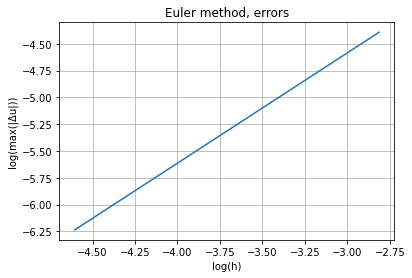

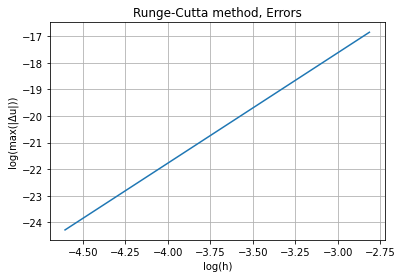

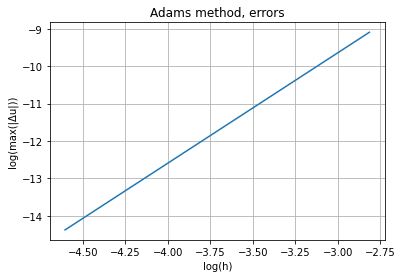

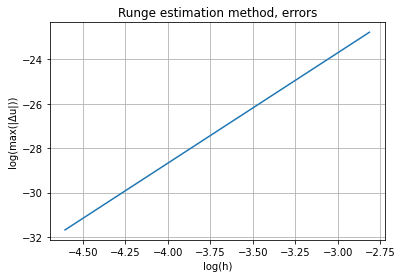

In [ ]:
hMin = 0.01
hMax = 0.1
step = 0.05
hRange = np.arange(hMin,hMax,step)
hLogRange = [np.log(hRange[i]) for i in range(len(hRange))]

eulerErrors = []
rungeCuttaErrors = []
adamsErrors = []
rungeEstimationErrors = []

for i in range(len(hRange)):
  xRangeList = np.arange(a, b + hRange[i], hRange[i])
  yRangeList = analyticSolution(xRangeList)
  eulerErrors.append(max([np.log(abs(yRangeList[i] - euler(equation, xRangeList, func, u0)[i])) for i in range(len(xRangeList))]))
  rungeCuttaErrors.append(max([np.log(abs(yRangeList[j] - rungeCutta(equation, xRangeList, func, u0)[0][j])) for j in range(len(xRangeList))]))
  adamsErrors.append(max([np.log(abs(yRangeList[i] - adams(equation, xRangeList, func, u0)[i])) for i in range(len(xRangeList))]))
  rungeEstimationErrors.append(max([np.log(abs(yRangeList[i] - rungeEstimation(equation, xRangeList, func, u0)[i])) for i in range(len(xRangeList))]))

plt.figure(1)
plt.title("Euler method, errors")
plt.xlabel("log(h)")
plt.ylabel("log(max(|Δu|))")
plt.grid()
plt.plot(hLogRange,eulerErrors)
gradient = (eulerErrors[-1] - eulerErrors[0]) / (hLogRange[-1] - hLogRange[0])
print ("Gradient of Euler method: ", gradient)

plt.figure(2)
plt.title("Runge-Cutta method, Errors")
plt.xlabel("log(h)")
plt.ylabel("log(max(|Δu|))")
plt.grid()
plt.plot(hLogRange,rungeCuttaErrors)
gradient = (rungeCuttaErrors[-1] - rungeCuttaErrors[0]) / (hLogRange[-1] - hLogRange[0])
print ("Gradient of Runge-Cutta method: ", gradient)

plt.figure(3)
plt.title("Adams method, errors")
plt.xlabel("log(h)")
plt.ylabel("log(max(|Δu|))")
plt.grid()
plt.plot(hLogRange,adamsErrors)
gradient = (adamsErrors[-1] - adamsErrors[0]) / (hLogRange[-1] - hLogRange[0])
print ("Gradient of Adams method: ", gradient)

plt.figure(4)
plt.title("Runge estimation method, errors")
plt.xlabel("log(h)")
plt.ylabel("log(max(|Δu|))")
plt.grid()
plt.plot(hLogRange,rungeEstimationErrors)
gradient = (rungeEstimationErrors[-1] - rungeEstimationErrors[0]) / (hLogRange[-1] - hLogRange[0])
print ("Gradient of Runge estimation method: ", gradient)